# Training with Activity State farm dataset "Distracted Driver"

#### Split data and make sure that new drivers/subjects are introduced in the validation test data

In [0]:
import pandas as pd

sf_data = pd.read_csv('data/statefarm_data/driver_imgs_list.csv')

print(len(sf_data))

22424


17778
4646


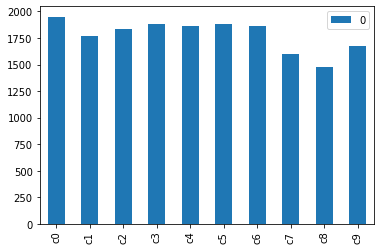

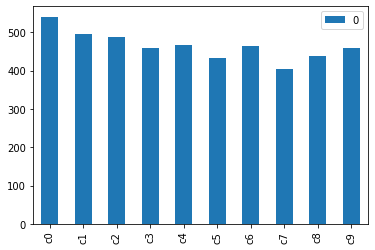

In [0]:
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np

#train, valid = train_test_split(sf_data, test_size= 0.2, stratify=sf_data['classname'])

train, valid = train_test_split(sf_data, train_size= 17778, shuffle=False)

letter_counts = Counter(train['classname'])

print(len(train))
print(len(valid))

df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')


letter_counts = Counter(valid['classname'])

df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

In [0]:
print(np.unique(train['subject']))
print(np.unique(valid['subject']))

['p002' 'p012' 'p014' 'p015' 'p016' 'p021' 'p022' 'p024' 'p026' 'p035'
 'p039' 'p041' 'p042' 'p045' 'p047' 'p049' 'p050' 'p051' 'p052' 'p056']
['p061' 'p064' 'p066' 'p072' 'p075' 'p081']


In [0]:
train.to_pickle('data/statefarm_data/train.csv')
valid.to_pickle('data/statefarm_data/valid.csv')

### Start training with ResNet50 with Splitted Data

In [0]:
!python main.py configs/SF_RESNET50_0.json

Using TensorFlow backend.
 THE Configuration of your experiment ..
{'agent': 'SF_Agent',
 'batch_size': 16,
 'callbacks': {'checkpoint_mode': 'max',
               'checkpoint_monitor': 'val_acc',
               'checkpoint_save_best_only': True,
               'checkpoint_save_weights_only': False,
               'checkpoint_verbose': True,
               'tensorboard_write_graph': True},
 'data_dir': 'data/statefarm_data/',
 'data_loader': 'SF_DataGenerator',
 'exp_name': 'SF_RESNET50_0',
 'learning_rate': 1e-05,
 'max_epoch': 200,
 'mode': 'train',
 'model': 'ResNet50',
 'num_classes': 10,
 'num_workers': 16,
 'optimizer': 'Adam',
 'resize': [480, 640],
 'seed': 1337,
 'single_label': True,
 'train_csv': 'data/statefarm_data/train.csv',
 'use_scheduler': False,
 'valid_csv': 'data/statefarm_data/valid.csv',
 'verbose_training': 1}
 *************************************** 
The experiment name is SF_RESNET50_0
 *************************************** 
[INFO]: Hi, This is root.
[INFO]:

##### Choose Smaller learning rate as model overfitted quickly

In [6]:
!python main.py configs/SF_RESNET50_1.json

Using TensorFlow backend.
 THE Configuration of your experiment ..
{'agent': 'SF_Agent',
 'batch_size': 12,
 'callbacks': {'checkpoint_mode': 'max',
               'checkpoint_monitor': 'val_acc',
               'checkpoint_save_best_only': True,
               'checkpoint_save_weights_only': False,
               'checkpoint_verbose': True,
               'tensorboard_write_graph': True},
 'data_dir': 'data/statefarm_data/',
 'data_loader': 'SF_DataGenerator',
 'exp_name': 'SF_RESNET50_1',
 'learning_rate': 1e-06,
 'max_epoch': 200,
 'mode': 'train',
 'model': 'ResNet50',
 'num_classes': 10,
 'num_workers': 16,
 'optimizer': 'Adam',
 'resize': [480, 640],
 'seed': 1337,
 'single_label': True,
 'train_csv': 'data/statefarm_data/train.csv',
 'use_scheduler': False,
 'valid_csv': 'data/statefarm_data/valid.csv',
 'verbose_training': 1}
 *************************************** 
The experiment name is SF_RESNET50_1
 *************************************** 
[INFO]: Hi, This is root.
[INFO]:

Testing on Best epoch "SF_RESNET50_0-02-0.86.hdf5"

In [7]:
!python main.py configs/SF_RESNET50_0_test.json

Using TensorFlow backend.
 THE Configuration of your experiment ..
{'agent': 'SF_Agent',
 'batch_size': 1,
 'best_file': 'SF_RESNET50_0-02-0.86.hdf5',
 'callbacks': {'checkpoint_mode': 'max',
               'checkpoint_monitor': 'val_acc',
               'checkpoint_save_best_only': True,
               'checkpoint_save_weights_only': False,
               'checkpoint_verbose': True,
               'tensorboard_write_graph': True},
 'data_dir': 'data/statefarm_data/',
 'data_loader': 'SF_DataGenerator',
 'exp_name': 'SF_RESNET50_0',
 'learning_rate': 1e-05,
 'max_epoch': 200,
 'mode': 'test',
 'model': 'ResNet50',
 'num_classes': 10,
 'num_workers': 16,
 'optimizer': 'Adam',
 'resize': [480, 640],
 'seed': 1337,
 'single_label': True,
 'train_csv': 'data/statefarm_data/train.csv',
 'use_scheduler': False,
 'valid_csv': 'data/statefarm_data/valid.csv',
 'verbose_training': 1}
 *************************************** 
The experiment name is SF_RESNET50_0
 ********************************